In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datasets  
dataset = pd.read_excel ("/home/shivam/Desktop/Mini Project/Z-Alizadehsanidataset.xlsx")   
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current_Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway_disease         303 non-null    object 
 14  Thyroid_Disease        303 non-null    object 
 15  CHF   

In [3]:
# Description
dataset.describe()

,Age,Weight,Length,BMI,DM,HTN,Current_Smoker,EX-Smoker,FH,BP,...,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region_RWMA,Cath
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462,0.712871
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531,0.453171
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000,1.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000,1.000000


In [4]:
dataset

,Age,Weight,Length,Sex,BMI,DM,HTN,Current_Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region_RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,1
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,1
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,1
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,0
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,1
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,0
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,0
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,0


In [5]:
# Verifying it as a 'dataframe' object in pandas
type(dataset)

pandas.core.frame.DataFrame

In [6]:
# Shape of dataset
dataset.shape

(303, 56)

## Looking For Missing Values(if any) 

In [7]:
dataset.isnull()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current_Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region_RWMA,VHD,Cath
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# No Missing values

In [9]:
# Target variable description
dataset["Cath"].describe()

count    303.000000
mean       0.712871
std        0.453171
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cath, dtype: float64

In [10]:
dataset["Cath"].unique()

array([1, 0])

### Clearly, this is a classification problem, with the target variable having values 'Cad' and 'Normal'

## Checking Coorelation Between Dataset

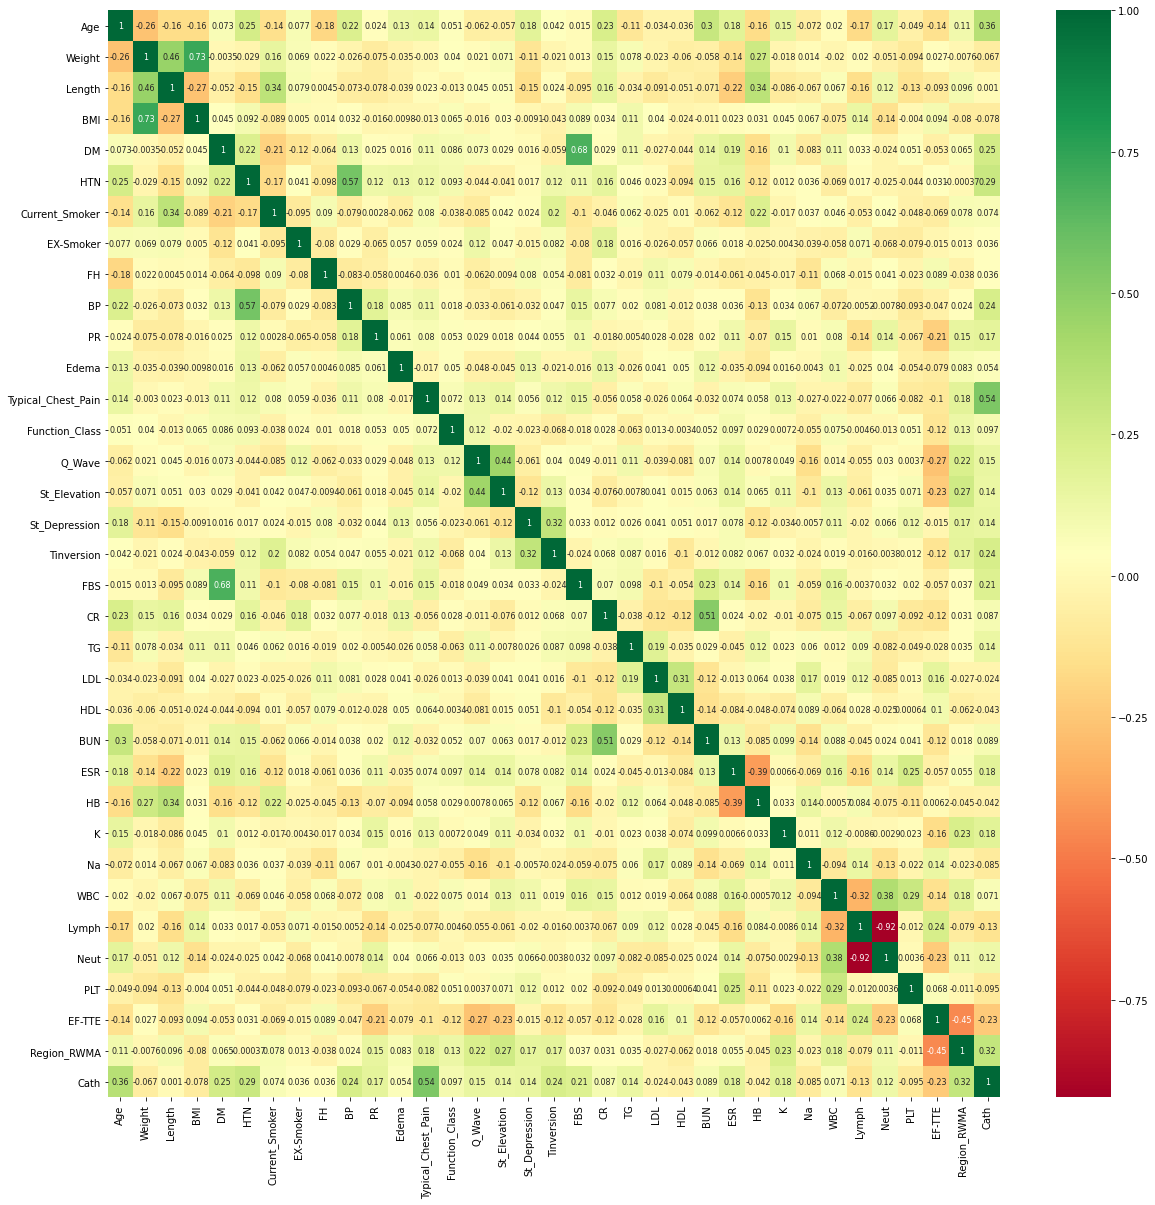

In [11]:
#Feature Selection
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn",annot_kws={"size":8}) 

## Analysing Target Variable

1    216
0     87
Name: Cath, dtype: int64


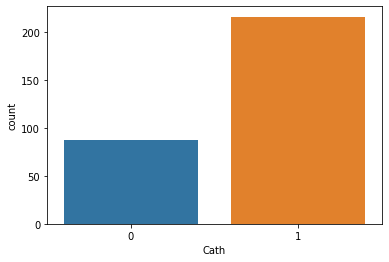

In [12]:
y = dataset["Cath"]

sns.countplot(y)

target_temp = dataset.Cath.value_counts()

print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 28.71
Percentage of patience with heart problems: 71.29


In [14]:
y = dataset['Cath']
X = dataset.drop(['Cath'], axis = 1)

In [15]:
# converting categorical data into dummy or indicator variables
dataset = pd.get_dummies(dataset, columns = ['Sex','Obesity','CRF','CVA','Airway_disease','Thyroid_Disease','CHF','DLP','Weak_Peripheral_Pulse','Lung_rales','Systolic_Murmur','Diastolic_Murmur','Dyspnea','Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'LVH', 'Poor_R_Progression', 'BBB', 'VHD']) 

In [16]:
dataset.shape

(303, 79)

In [17]:
dataset

,Age,Weight,Length,BMI,DM,HTN,Current_Smoker,EX-Smoker,FH,BP,...,LVH_Y,Poor_R_Progression_N,Poor_R_Progression_Y,BBB_LBBB,BBB_N,BBB_RBBB,VHD_Moderate,VHD_N,VHD_Severe,VHD_mild
0,53,90,175,29.387755,0,1,1,0,0,110,...,0,1,0,0,1,0,0,1,0,0
1,67,70,157,28.398718,0,1,0,0,0,140,...,0,1,0,0,1,0,0,1,0,0
2,54,54,164,20.077335,0,0,1,0,0,100,...,0,1,0,0,1,0,0,0,0,1
3,66,67,158,26.838648,0,1,0,0,0,100,...,0,1,0,0,1,0,0,0,1,0
4,50,87,153,37.165193,0,1,0,0,0,110,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,29.761905,0,0,0,0,0,100,...,0,1,0,0,1,0,0,1,0,0
299,55,64,152,27.700831,0,0,0,0,0,100,...,0,1,0,1,0,0,0,0,0,1
300,48,77,160,30.078125,0,1,0,0,1,130,...,0,1,0,0,0,1,0,1,0,0
301,57,90,159,35.599858,1,0,0,0,0,100,...,0,1,0,0,1,0,0,1,0,0


## Train Test split

In [18]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("Cath",axis=1)
target = dataset["Cath"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.10,random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((272, 78), (272,), (31, 78), (31,))

### Remove constant features

In [19]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((272, 77), (31, 77))

### Remove quasi-constant features

In [20]:
from sklearn.feature_selection import VarianceThreshold
# remove quasi-constant features
# 0.1 indicates 99% of observations approximately
sel = VarianceThreshold(threshold=0.01)  
# fit finds the features with low variance
sel.fit(X_train)  
# how many not quasi-constant?
sum(sel.get_support())

73

In [21]:
features_to_keep = X_train.columns[sel.get_support()]

In [22]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((272, 73), (31, 73))

In [23]:
# sklearn transformations lead to numpy arrays
# here we transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

### Remove correlated features

In [24]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  17


In [25]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((272, 56), (31, 56))

In [26]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Univariate Selection

In [27]:
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [28]:
# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(dataset.select_dtypes(include=numerics).columns)

In [29]:
data = dataset[numerical_features]

In [30]:
data.head()

,Age,Weight,Length,BMI,DM,HTN,Current_Smoker,EX-Smoker,FH,BP,...,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region_RWMA,Cath
0,53,90,175,29.387755,0,1,1,0,0,110,...,15.6,4.7,141,5700,39,52,261,50,0,1
1,67,70,157,28.398718,0,1,0,0,0,140,...,13.9,4.7,156,7700,38,55,165,40,4,1
2,54,54,164,20.077335,0,0,1,0,0,100,...,13.5,4.7,139,7400,38,60,230,40,2,1
3,66,67,158,26.838648,0,1,0,0,0,100,...,12.1,4.4,142,13000,18,72,742,55,0,0
4,50,87,153,37.165193,0,1,0,0,0,110,...,13.2,4.0,140,9200,55,39,274,50,0,0


In [31]:
X = data.drop(['Cath'], axis=1)
X.head()

,Age,Weight,Length,BMI,DM,HTN,Current_Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region_RWMA
0,53,90,175,29.387755,0,1,1,0,0,110,...,7,15.6,4.7,141,5700,39,52,261,50,0
1,67,70,157,28.398718,0,1,0,0,0,140,...,26,13.9,4.7,156,7700,38,55,165,40,4
2,54,54,164,20.077335,0,0,1,0,0,100,...,10,13.5,4.7,139,7400,38,60,230,40,2
3,66,67,158,26.838648,0,1,0,0,0,100,...,76,12.1,4.4,142,13000,18,72,742,55,0
4,50,87,153,37.165193,0,1,0,0,0,110,...,27,13.2,4.0,140,9200,55,39,274,50,0


In [32]:
y = data['Cath']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Cath, dtype: int64

In [33]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train.fillna(0), Y_train)
mutual_info

array([0.02359551, 0.00271128, 0.        , 0.01770685, 0.03628211,
       0.01218367, 0.        , 0.07096267, 0.02691072, 0.03619592,
       0.        , 0.        , 0.14385162, 0.        , 0.01646502,
       0.03245169, 0.        , 0.02108764, 0.0303336 , 0.04330453,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00789372, 0.02913232, 0.00325645, 0.        , 0.04181986,
       0.        , 0.01918496, 0.04918742, 0.00196292, 0.        ,
       0.08724462, 0.06572618, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03045345, 0.02440941,
       0.12739839, 0.04897435, 0.        , 0.        , 0.02194572,
       0.        , 0.        , 0.        , 0.        , 0.03304318,
       0.06834567])

In [34]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

Typical_Chest_Pain         0.143852
Atypical_N                 0.127398
CRF_N                      0.087245
EX-Smoker                  0.070963
VHD_mild                   0.068346
CVA_N                      0.065726
Region_RWMA                0.049187
Nonanginal_N               0.048974
CR                         0.043305
Lymph                      0.041820
DM                         0.036282
BP                         0.036196
VHD_Severe                 0.033043
St_Elevation               0.032452
Diastolic_Murmur_N         0.030453
FBS                        0.030334
K                          0.029132
FH                         0.026911
Dyspnea_N                  0.024409
Age                        0.023596
BBB_LBBB                   0.021946
Tinversion                 0.021088
EF-TTE                     0.019185
BMI                        0.017707
Q_Wave                     0.016465
HTN                        0.012184
HB                         0.007894
Na                         0

<AxesSubplot:>

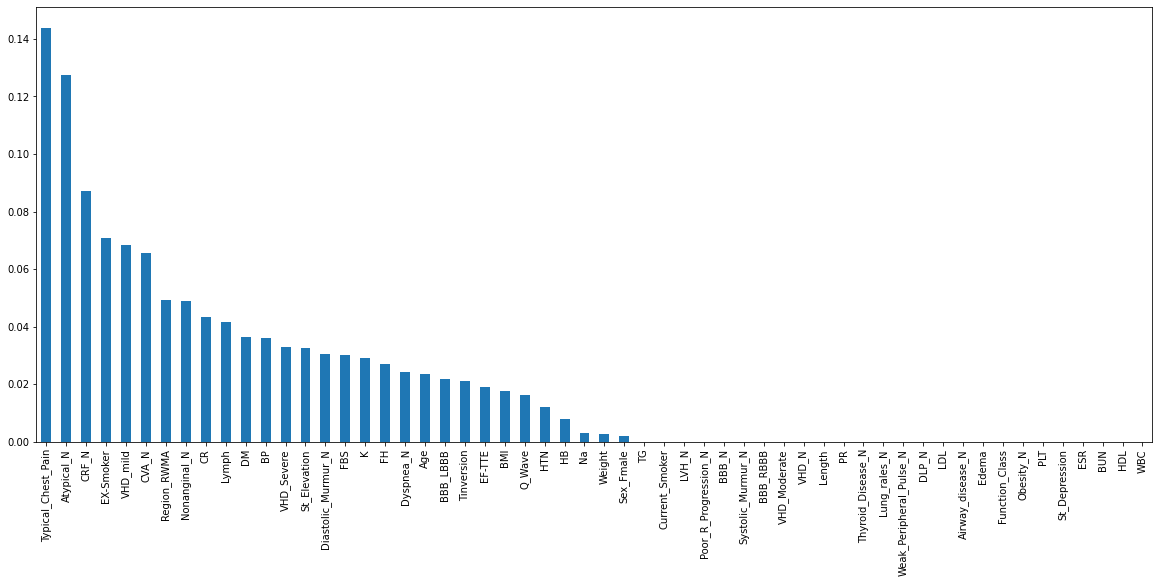

In [35]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

As we can see in the plot above from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 10 percentile of features or first 20 features etc.

To do this we can use a combination of "SelectKbest" or "SelectPercentile".

In [36]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), Y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['Age', 'EX-Smoker', 'BP', 'Typical_Chest_Pain', 'Lymph', 'EF-TTE',
       'Region_RWMA', 'Sex_Fmale', 'Atypical_N', 'VHD_Moderate'],
      dtype='object')


In [37]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


### Univariate roc-auc or mse

In [38]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [39]:
# here for simplicity we will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(303, 35)

In [40]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), Y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(Y_test, y_scored[:, 1]))

In [41]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

Typical_Chest_Pain         0.809091
Age                        0.800000
FBS                        0.763636
Atypical_N                 0.718182
Tinversion                 0.709091
EF-TTE                     0.693182
HTN                        0.668182
Region_RWMA                0.650000
PR                         0.645455
St_Depression              0.634091
ESR                        0.609091
BUN                        0.600000
VHD_N                      0.572727
DM                         0.554545
Weak_Peripheral_Pulse_N    0.550000
LDL                        0.547727
Diastolic_Murmur_N         0.545455
BBB_LBBB                   0.545455
BBB_N                      0.545455
Nonanginal_N               0.545455
Current_Smoker             0.534091
LVH_N                      0.529545
VHD_Moderate               0.529545
Dyspnea_N                  0.527273
TG                         0.527273
St_Elevation               0.525000
Airway_disease_N           0.525000
Q_Wave                     0

<AxesSubplot:>

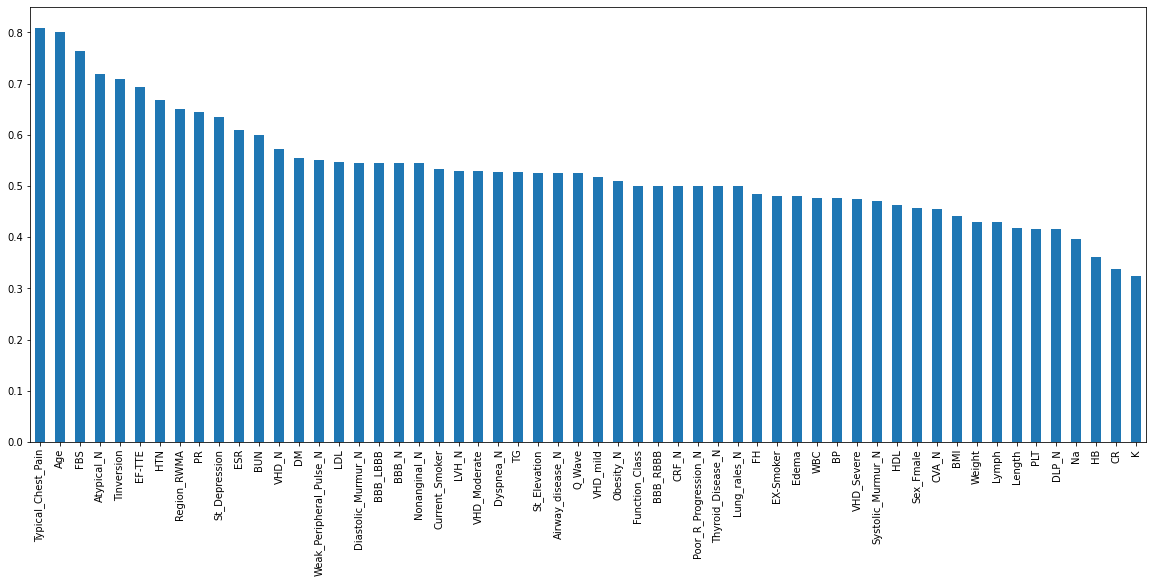

In [42]:
# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [43]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

selected_feat = roc_values[roc_values > 0.5]
len(selected_feat), X_train.shape[1]

(30, 56)

30 of 56 features show a predictive performance higher than 0.5. This means that we could remove 26 features from this dataset using this method.

In [44]:
selected_feat

Age                        0.800000
DM                         0.554545
HTN                        0.668182
Current_Smoker             0.534091
PR                         0.645455
Typical_Chest_Pain         0.809091
Q_Wave                     0.525000
St_Elevation               0.525000
St_Depression              0.634091
Tinversion                 0.709091
FBS                        0.763636
TG                         0.527273
LDL                        0.547727
BUN                        0.600000
ESR                        0.609091
EF-TTE                     0.693182
Region_RWMA                0.650000
Obesity_N                  0.509091
Airway_disease_N           0.525000
Weak_Peripheral_Pulse_N    0.550000
Diastolic_Murmur_N         0.545455
Dyspnea_N                  0.527273
Atypical_N                 0.718182
Nonanginal_N               0.545455
LVH_N                      0.529545
BBB_LBBB                   0.545455
BBB_N                      0.545455
VHD_Moderate               0

In [45]:
X_train = X_train[selected_feat.index]
X_test = X_test[selected_feat.index]

## Model Fitting

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
# Function to automate fitting and spot checking models 
def classifer(model,train_x,train_y,test,true):
    model.fit(train_x,train_y)
    prediction= model.predict(X_test)
    print(classification_report(true,prediction))
    #print('The accuracy of this model is: %s' % '{0:.3%}'.format(accuracy_score(true,prediction)))
    
    # Create confusion matrix plot
    cm = confusion_matrix(y_test,prediction)
    fig= plot_confusion_matrix(conf_mat=cm,figsize=(4,4),cmap=plt.cm.Reds,hide_spines=True)
    plt.title('Confusion Matrix',fontsize=14)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.grid('off')

    # 10-fold Cross Validation
    accuracies = cross_val_score(estimator= model,X= X_train,y=y_train,cv=10)
    print("The average model accuracy score is : %s" % "{0:.3%}".format(accuracies.mean()))
    print("The average accuracy score standard deviation is : %s" % "{0:.3%}".format(accuracies.std()))


### I. K Nearest Neighbors

In [48]:
y = dataset['Cath']
X = dataset.drop(['Cath'], axis = 1)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=40)
    knn_scores.append(score.mean())
    knn_classifier.fit(X_train,Y_train)
    Y_pred_knn=knn_classifier.predict(X_test)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

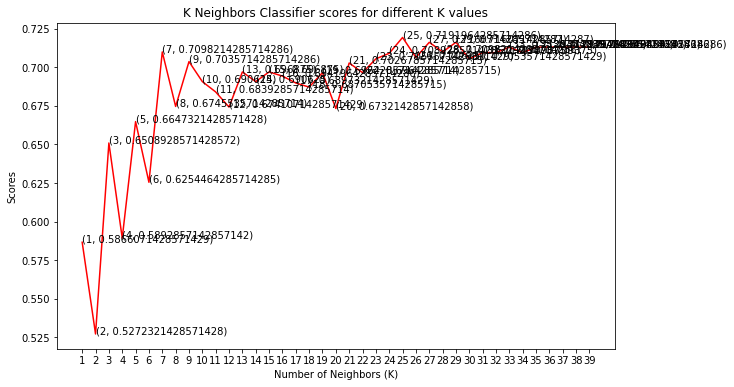

In [50]:
plt.figure(figsize=(10,6))
plt.plot([k for k in range(1, 40)], knn_scores, color = 'red')
for i in range(1,40):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 40)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [51]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
score=cross_val_score(knn_classifier,X,y,cv=10)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.97 %


In [52]:
score.mean()

0.6669892473118281

### Confusion Matrix of KNN

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
matrix= confusion_matrix(Y_test, Y_pred_knn)

<AxesSubplot:>

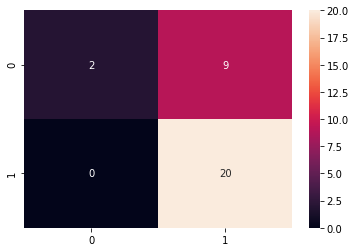

In [55]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision Score

In [56]:
from sklearn.metrics import precision_score

In [57]:
precision = precision_score(Y_test, Y_pred_knn)

In [58]:
print("Precision: ",precision)

Precision:  0.6896551724137931


### Recall

In [59]:
from sklearn.metrics import recall_score

In [60]:
recall = recall_score(Y_test, Y_pred_knn)

In [61]:
print("Recall is: ",recall)

Recall is:  1.0


### F-Score

In [62]:
print((2*precision*recall)/(precision+recall))

0.8163265306122449


In [63]:
CM =pd.crosstab(Y_test, Y_pred_knn)
CM

col_0,0,1
Cath,,
0,2,9
1,0,20


## II. SVM

In [64]:
from sklearn import svm
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [65]:
Y_pred_svm.shape

(31,)

In [66]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 87.1 %


### Confusion Matrix of SVM

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
matrix= confusion_matrix(Y_test, Y_pred_svm)

<AxesSubplot:>

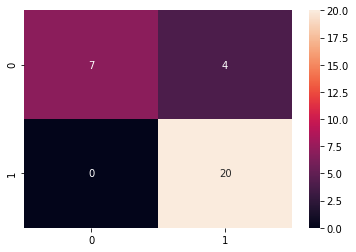

In [69]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision Score

In [70]:
from sklearn.metrics import precision_score

In [71]:
precision = precision_score(Y_test, Y_pred_svm)

In [72]:
print("Precision: ",precision)

Precision:  0.8333333333333334


### Recall

In [73]:
from sklearn.metrics import recall_score

In [74]:
recall = recall_score(Y_test, Y_pred_svm)

In [75]:
print("Recall is: ",recall)

Recall is:  1.0


### F-Score

In [76]:
print((2*precision*recall)/(precision+recall))

0.9090909090909091


In [77]:
CM =pd.crosstab(Y_test, Y_pred_svm)
CM

col_0,0,1
Cath,,
0,7,4
1,0,20


In [78]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [79]:
fnr=FN*100/(FN+TP)
fnr

0.0

## III. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [81]:
Y_pred_lr.shape

(31,)

In [82]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.87 %


### Confusion Matrix of Logistic Regression

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
matrix= confusion_matrix(Y_test, Y_pred_lr)

<AxesSubplot:>

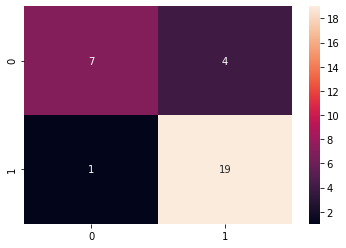

In [85]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision Score

In [86]:
from sklearn.metrics import precision_score

In [87]:
precision = precision_score(Y_test, Y_pred_lr)

In [88]:
print("Precision: ",precision)

Precision:  0.8260869565217391


### Recall

In [89]:
from sklearn.metrics import recall_score

In [90]:
recall = recall_score(Y_test, Y_pred_lr)

In [91]:
print("Recall is: ",recall)

Recall is:  0.95


### F-Score

In [92]:
print((2*precision*recall)/(precision+recall))

0.8837209302325583


In [93]:
CM =pd.crosstab(Y_test, Y_pred_lr)
CM

col_0,0,1
Cath,,
0,7,4
1,1,19


In [94]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [95]:
fnr=FN*100/(FN+TP)
fnr

5.0

## IV. Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [97]:
Y_pred_nb.shape

(31,)

In [98]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 70.97 %


### Confusion Matrix for Naive Bayes

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
matrix= confusion_matrix(Y_test, Y_pred_nb)

<AxesSubplot:>

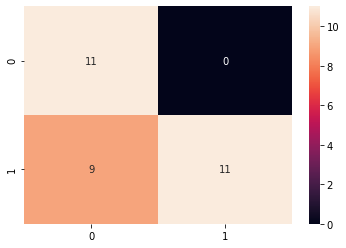

In [101]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision Score

In [102]:
from sklearn.metrics import precision_score

In [103]:
precision = precision_score(Y_test, Y_pred_nb)

In [104]:
print("Precision: ",precision)

Precision:  1.0


### Recall

In [105]:
from sklearn.metrics import recall_score

In [106]:
recall = recall_score(Y_test, Y_pred_nb)

In [107]:
print("Recall is: ",recall)

Recall is:  0.55


### F-Score

In [108]:
print((2*precision*recall)/(precision+recall))

0.7096774193548387


In [109]:
CM =pd.crosstab(Y_test, Y_pred_nb)
CM

col_0,0,1
Cath,,
0,11,0
1,9,11


In [110]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [111]:
fnr=FN*100/(FN+TP)
fnr

45.0

## V. Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [113]:
print(Y_pred_dt.shape)

(31,)


In [114]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 93.55 %


### Confusion Matrix of Decision Tree

In [115]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

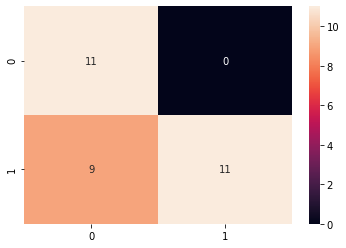

In [116]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision Score

In [117]:
from sklearn.metrics import precision_score

In [118]:
precision = precision_score(Y_test, Y_pred_dt)

In [119]:
print("Precision: ",precision)

Precision:  0.9090909090909091


### Recall

In [120]:
from sklearn.metrics import recall_score

In [121]:
recall = recall_score(Y_test, Y_pred_dt)

In [122]:
print("Recall is: ",recall)

Recall is:  1.0


### F-Score

In [123]:
print((2*precision*recall)/(precision+recall))

0.9523809523809523


In [124]:
CM =pd.crosstab(Y_test, Y_pred_dt)
CM

col_0,0,1
Cath,,
0,9,2
1,0,20


In [125]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [126]:
fnr=FN*100/(FN+TP)
fnr

0.0

### VI. Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [128]:
Y_pred_rf.shape

(31,)

In [129]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 93.55 %


### Confusion Matrix of Random Forest

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
matrix= confusion_matrix(Y_test, Y_pred_rf)

<AxesSubplot:>

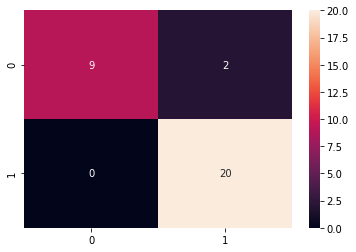

In [132]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision score

In [133]:
from sklearn.metrics import precision_score

In [134]:
precision = precision_score(Y_test, Y_pred_rf)

In [135]:
print("Precision: ",precision)

Precision:  0.9090909090909091


### recall

In [136]:
from sklearn.metrics import recall_score

In [137]:
recall = recall_score(Y_test, Y_pred_rf)

In [138]:
print("Recall is: ",recall)

Recall is:  1.0


### F score

In [139]:
print((2*precision*recall)/(precision+recall))

0.9523809523809523


In [140]:
CM =pd.crosstab(Y_test, Y_pred_rf)
CM

col_0,0,1
Cath,,
0,9,2
1,0,20


In [141]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

#### False negative rate of the model

In [142]:
fnr=FN*100/(FN+TP)
fnr

0.0

### Final Result

In [143]:
scores = [score_knn,score_svm,score_lr,score_nb,score_dt,score_rf]
algorithms = ["K Nearest Neighbors","Support Vector Machine","Logistic Regression","Naive Bayes","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using K Nearest Neighbors is: 70.97 %
The accuracy score achieved using Support Vector Machine is: 87.1 %
The accuracy score achieved using Logistic Regression is: 83.87 %
The accuracy score achieved using Naive Bayes is: 70.97 %
The accuracy score achieved using Decision Tree is: 93.55 %
The accuracy score achieved using Random Forest is: 93.55 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

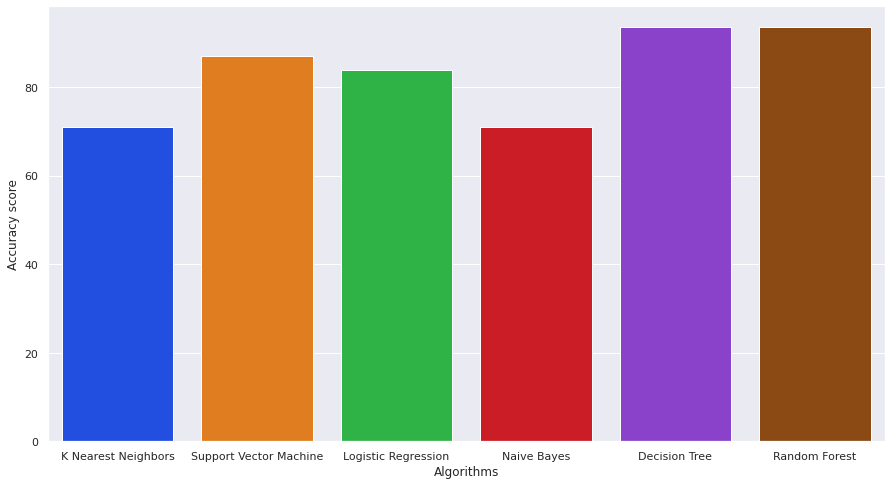

In [144]:
sns.set(rc={'figure.figsize':(15,8)},palette='bright')

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores,)